In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Display numbers not in scientific notation:
pd.options.display.float_format = '{:.2f}'.format


# 1.0 EDA on customer dataset

In [2]:
# Read in the customer data csv:
df_cust = pd.read_csv('../data/customers.csv', index_col=0).reset_index()

In [9]:
df_cust

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.00,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.00,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.00,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.00,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.00,1.00,ACTIVE,Regularly,52.00,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...
...,...,...,...,...,...,...,...
1371975,ffffbbf78b6eaac697a8a5dfbfd2bfa8113ee5b403e474...,NaN,NaN,ACTIVE,NONE,24.00,7aa399f7e669990daba2d92c577b52237380662f36480b...
1371976,ffffcd5046a6143d29a04fb8c424ce494a76e5cdf4fab5...,NaN,NaN,ACTIVE,NONE,21.00,3f47f1279beb72215f4de557d950e0bfa73789d24acb5e...
1371977,ffffcf35913a0bee60e8741cb2b4e78b8a98ee5ff2e6a1...,1.00,1.00,ACTIVE,Regularly,21.00,4563fc79215672cd6a863f2b4bf56b8f898f2d96ed590e...
1371978,ffffd7744cebcf3aca44ae7049d2a94b87074c3d4ffe38...,1.00,1.00,ACTIVE,Regularly,18.00,8892c18e9bc3dca6aa4000cb8094fc4b51ee8db2ed14d7...


In [4]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [11]:
# 'FN' and 'Active' are either 1 or missing value.
# Fill NaNs with zeros:

df_cust.FN.fillna(value=0, inplace=True)
df_cust.Active.fillna(value=0, inplace=True)


In [12]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [13]:
df_cust.describe()

,FN,Active,age
count,1371980.00,1371980.00,1356119.00
mean,0.35,0.34,36.39
std,0.48,0.47,14.31
min,0.00,0.00,16.00
25%,0.00,0.00,24.00
50%,0.00,0.00,32.00
75%,1.00,1.00,49.00
max,1.00,1.00,99.00


In [22]:
# Count club member status:
df_cust.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

<AxesSubplot:xlabel='age', ylabel='Count'>

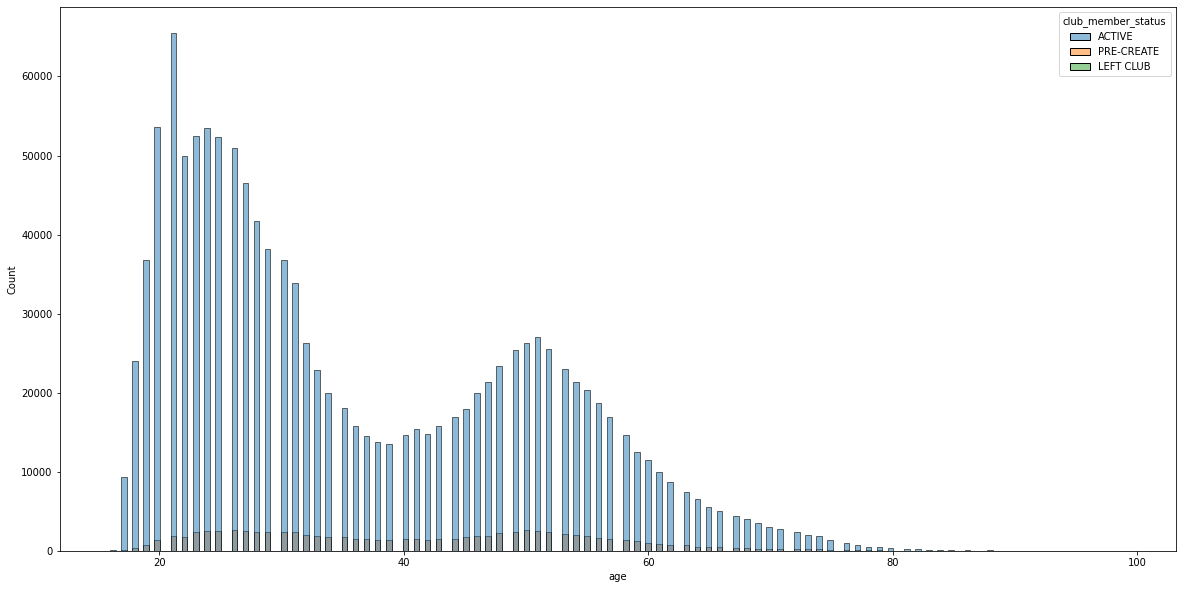

In [21]:
# Plot age and club member status
fig = plt.figure(figsize=(20, 10))
sns.histplot(x='age', hue='club_member_status', data=df_cust)

<AxesSubplot:xlabel='age', ylabel='Count'>

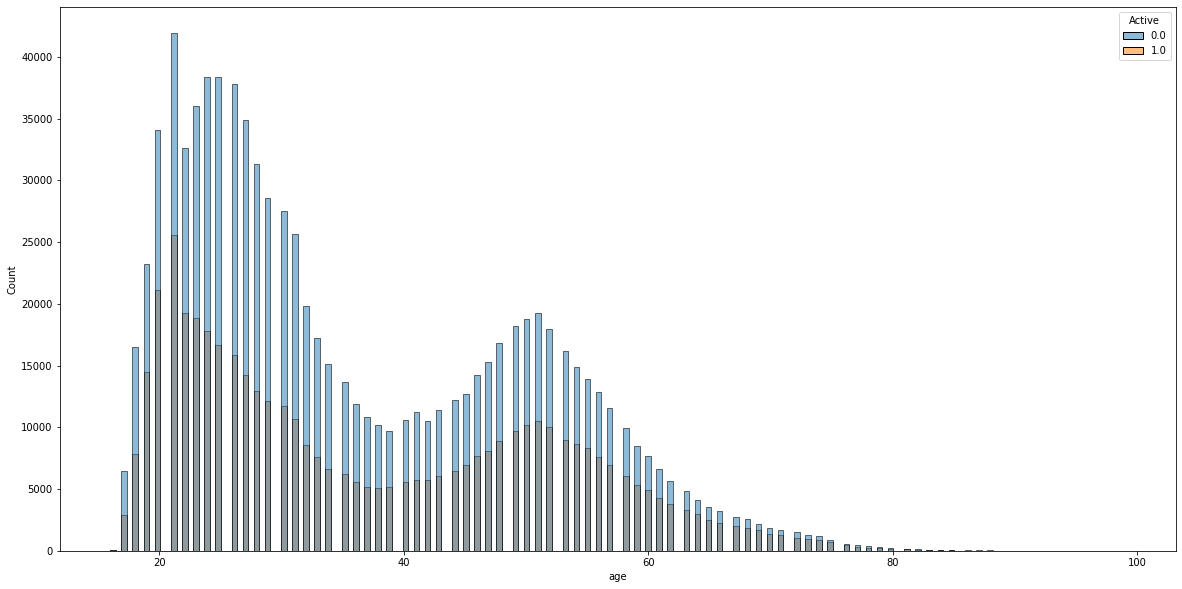

In [26]:
# Plot age and "Active"-column:

fig = plt.figure(figsize=(20, 10))
sns.histplot(x='age', hue='Active', data=df_cust)

<AxesSubplot:xlabel='Active', ylabel='count'>

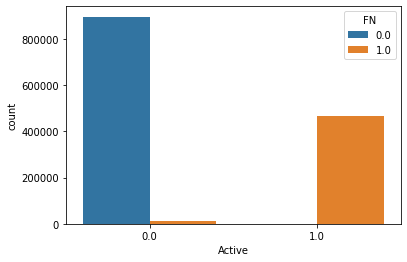

In [27]:
sns.countplot(x="Active", hue="FN", data=df_cust)

In [37]:
pd.crosstab(df_cust.FN, df_cust.Active)

Active,0.00,1.00
FN,,
0.00,895050,0
1.00,12526,464404


<AxesSubplot:xlabel='club_member_status', ylabel='count'>

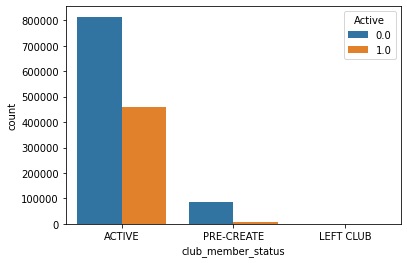

In [28]:
sns.countplot(x="club_member_status", hue="Active", data=df_cust)

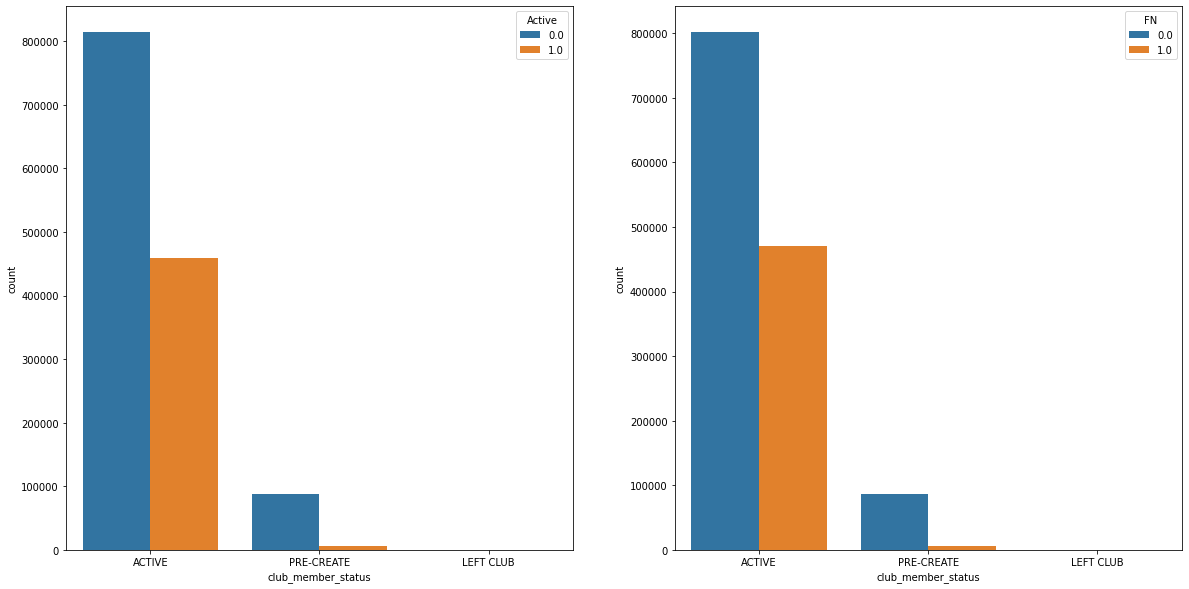

In [36]:
fig, ax =plt.subplots(1,2, figsize=(20, 10))
sns.countplot('club_member_status', hue='Active', data=df_cust, ax=ax[0])
sns.countplot('club_member_status', hue='FN', data=df_cust, ax=ax[1])
fig.show()

plt.show()

# 2.0 EDA on transaction dataset

In [5]:
# Read in the transaction data csv:

df_trans = pd.read_csv('../data/transactions_train.csv', index_col=0).reset_index()

In [5]:
df_trans.describe()

,article_id,price,sales_channel_id
count,31788324.00,31788324.00,31788324.00
mean,696227219.13,0.03,1.70
std,133448003.49,0.02,0.46
min,108775015.00,0.00,1.00
25%,632803008.00,0.02,1.00
50%,714582003.00,0.03,2.00
75%,786524001.00,0.03,2.00
max,956217002.00,0.59,2.00


In [17]:
# Create dataframe with turnover per customer via groupby() and sum():
df_tu_cust = df_trans.groupby('customer_id').sum().reset_index()
# Rename price column:
df_tu_cust.rename(columns={"price": "turnover"}, inplace=True)
# Drop not necessary columns:
df_tu_cust.drop(columns=['article_id','sales_channel_id'], inplace=True)

# Check the first rows:
df_tu_cust.head()



,customer_id,turnover
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.65
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.60
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.70
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.06
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.47


In [18]:
# Create dataframe which counts number of purchased articles per customer (spc = sales per customer):
df_spc = df_trans.customer_id.value_counts().reset_index()
# Rename the columns:
df_spc.rename(columns={"index": "customer_id", "customer_id": "sales_count"}, inplace=True)

# Check the first rows:
df_spc.head()



,customer_id,sales_count
0,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,1895
1,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,1441
2,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,1364
3,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,1361
4,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,1237


In [19]:
# Create dataframe which contains the turnover and number of purchased articles per customer ID:
df_sales_cust = pd.merge(df_tu_cust, df_spc, on="customer_id")

# Check the first rows:
df_sales_cust.head()


,customer_id,turnover,sales_count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.65,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,2.60,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.70,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.06,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0.47,13


In [21]:
# Sort dataframe by number of sales:
df_sales_cust.sort_values('sales_count', ascending=False).head(25)

,customer_id,turnover,sales_count
1011710,be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee9...,57.68,1895
962395,b4db5e5259234574edfff958e170fe3a5e13b6f146752c...,47.66,1441
391840,49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05...,30.13,1364
885174,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,50.92,1361
1090960,cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed...,41.33,1237
456062,55d15396193dfd45836af3a6269a079efea339e875eff4...,38.23,1208
1028179,c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27c...,34.51,1170
755132,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,39.76,1169
20162,03d0011487606c37c1b1ed147fc72f285a50c05f00b971...,49.97,1157
578832,6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2...,47.25,1143


#### RESULT

* 20 customers ordered more than 1000 articles in 2 years (2018-2020) --> Hypothesis: Are these resellers?

<AxesSubplot:xlabel='turnover', ylabel='sales_count'>

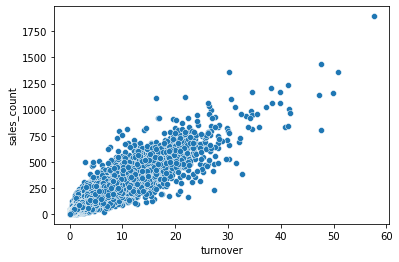

In [22]:
# Plot turnover vs purchased articles:
sns.scatterplot(x='turnover', y='sales_count', data=df_sales_cust)

In [94]:
# Create dataframe which includes customer basic data with turnover data:
df_cust_master = pd.merge(df_cust, df_sales_cust, on="customer_id")


In [95]:
df_cust_master.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code,turnover,sales_count
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.00,0.00,ACTIVE,NONE,49.00,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...,0.65,21
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.00,0.00,ACTIVE,NONE,25.00,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...,2.60,86
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.00,0.00,ACTIVE,NONE,24.00,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...,0.70,18
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.00,0.00,ACTIVE,NONE,54.00,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...,0.06,2
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.00,1.00,ACTIVE,Regularly,52.00,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...,0.47,13


<AxesSubplot:xlabel='turnover', ylabel='sales_count'>

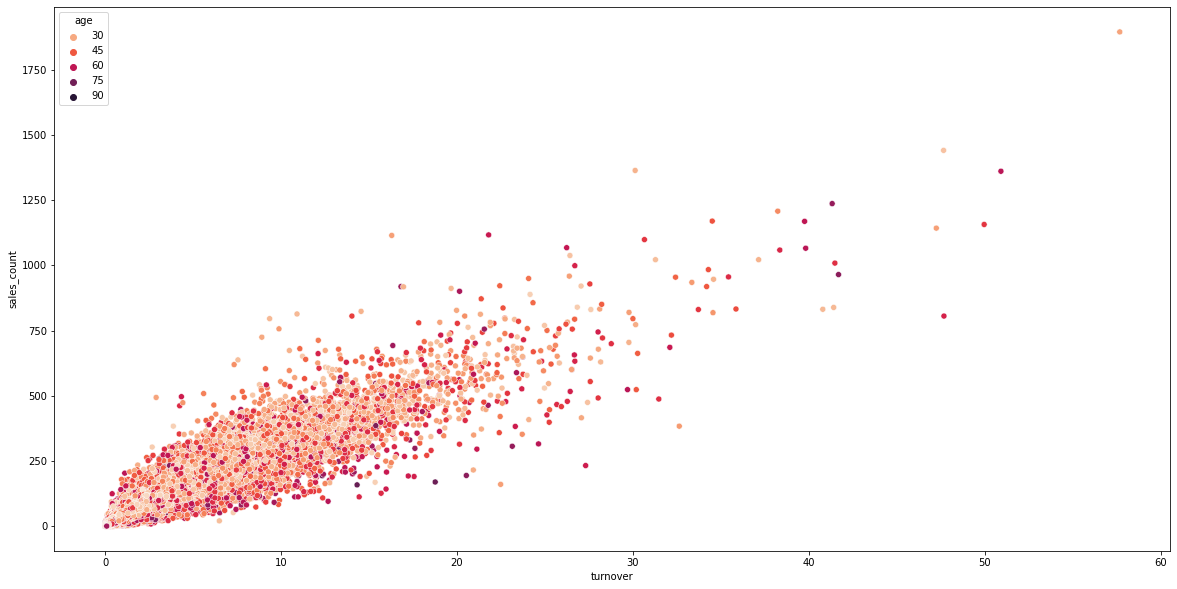

In [107]:
# Plot turnover vs purchased articles per age:
fig = plt.figure(figsize=(20, 10))
palette = sns.color_palette("rocket_r", as_cmap=True)
sns.scatterplot(x='turnover', y='sales_count', hue='age', palette=palette, data=df_cust_master)

# 3.0 EDA on article data

In [108]:
df_art = pd.read_csv('../data/articles.csv')

In [109]:
df_art.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [110]:
df_art.index_group_name.value_counts()

Ladieswear       39737
Baby/Children    34711
Divided          15149
Menswear         12553
Sport             3392
Name: index_group_name, dtype: int64

In [112]:
df_art.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [115]:
df_art.prod_name.value_counts()

Dragonfly dress                98
Mike tee                       72
Wow printed tee 6.99           70
1pk Fun                        55
TP Paddington Sweater          54
                               ..
W MARCIE DRESS CNY              1
W NAPOLI SKIRT CNY              1
BEANIE JERSEY FLEECED LINED     1
H-string multicolour            1
Lounge dress                    1
Name: prod_name, Length: 45875, dtype: int64

In [116]:
# Create dataframe which includes transactions and article metadata:
# df_trans_detail = pd.merge(df_trans, df_art, on="article_id")


In [117]:
# df_trans_detail.to_csv('../data/transaction_detail.csv')

In [23]:
df_trans_detail = pd.read_csv('../data/transaction_detail.csv')

In [118]:
df_trans_detail.product_group_name.value_counts()

Garment Upper body       12552755
Garment Lower body        7046054
Garment Full body         3552470
Swimwear                  2579222
Underwear                 2565858
Accessories               1599593
Shoes                      745521
Socks & Tights             685712
Nightwear                  348180
Unknown                     97040
Bags                         7313
Items                        5427
Cosmetic                     1500
Underwear/nightwear           559
Furniture                     533
Garment and Shoe care         279
Stationery                    229
Interior textile               74
Fun                             5
Name: product_group_name, dtype: int64

In [119]:
df_trans_detail.index_group_name.value_counts()

Ladieswear       20415260
Divided           7138254
Menswear          1771053
Sport             1246408
Baby/Children     1217349
Name: index_group_name, dtype: int64

In [120]:
df_trans.price.sum()

884645.9740508416

In [6]:
df_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


[Text(0, 0, 'offline'), Text(1, 0, 'online')]

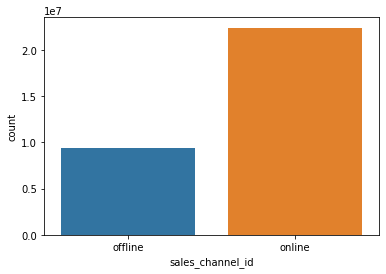

In [9]:
# Plot sales channel (1=offline, 2=online):

channel = ['offline', 'online']

f = sns.countplot('sales_channel_id', data=df_trans)
f.set_xticklabels(channel)


In [10]:
df_trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.05,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.03,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.02,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.02,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.02,2


In [6]:
df_trans['datetime'] = pd.to_datetime(df_trans['t_dat'])

In [15]:
df_trans['month_year'] = df_trans['datetime'].dt.strftime('%m/%Y')


In [7]:
df_trans.head()

,t_dat,customer_id,article_id,price,sales_channel_id,datetime
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.05,2,2018-09-20
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.03,2,2018-09-20
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.02,2,2018-09-20
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.02,2,2018-09-20
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.02,2,2018-09-20


<AxesSubplot:xlabel='month_year', ylabel='count'>

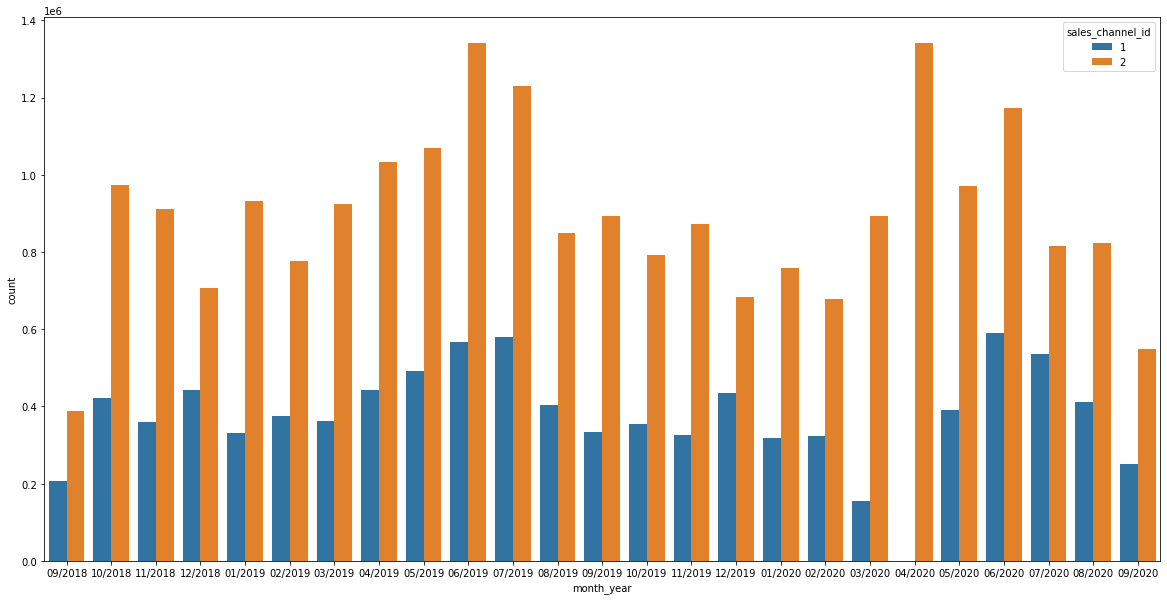

In [18]:
# Plot sales per month and channel (1=offline, 2=online):

fig = plt.figure(figsize=(20, 10))
sns.countplot('month_year', data=df_trans, hue='sales_channel_id')

In [8]:
# Define function for generating dataframe which calculates basketsizes per order.

def calc_basketsize (purchases):
    """Function to generate dataframe with basketsizes out of dataframe with single purchases. Assumption: Purchases of an individual customer on one day form an order.

    Args:
        purchases (_dataframe_): Dataframe which contains single purchases per customer in each row
    """    
    
    orderbaskets = purchases.groupby(['datetime', 'customer_id']).size().reset_index()
    orderbaskets.rename(columns={0: "basketsize"}, inplace=True)

    return orderbaskets

In [9]:
orders = calc_basketsize(df_trans)
orders

,datetime,customer_id,basketsize
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,2
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,5
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,5
3,2018-09-20,0008968c0d451dbc5a9968da03196fe20051965edde741...,2
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,30
...,...,...,...
9080174,2020-09-22,ffd4cf2217de4a0a3f9f610cdec334c803692a18af08ac...,9
9080175,2020-09-22,fff2282977442e327b45d8c89afde25617d00124d0f999...,2
9080176,2020-09-22,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,1
9080177,2020-09-22,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,1


RESULT: 
* Assumption: Several purchases of an individual customer on one individual day belong to one order.
* There are 9 mio orders in the dataset.

In [24]:
orders[orders['basketsize'] >= 5]

,datetime,customer_id,basketsize
1,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,5
2,2018-09-20,00083cda041544b2fbb0e0d2905ad17da7cf1007526fb4...,5
4,2018-09-20,000aa7f0dc06cd7174389e76c9e132a67860c5f65f9706...,30
12,2018-09-20,00401a367c5ac085cb9d4b77c56f3edcabf25153615db9...,11
18,2018-09-20,00609a1cc562140fa87a6de432bef9c9f0b936b259ad30...,5
...,...,...,...
9080158,2020-09-22,ff54fe15368409b7d0d691cdeebe2d6a3fee5178105277...,9
9080165,2020-09-22,ff732b98019465f078144bae647d7d9765d76e3431ef92...,6
9080169,2020-09-22,ffb72741f3bc3d98855703b55d34e05bc7893a5d6a99a3...,5
9080172,2020-09-22,ffcba92c45455b22f54dd02303b057c0a4b9b1f4fcfdf2...,5


RESULT: 
* 2 mio orders have a basketsize of 5 and more articles. 

In [25]:
orders.customer_id.value_counts()

a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    427
f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a    391
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    390
788785852eddb5874f924603105f315d69571b3e5180f3a7ae6970b55b6d5dc9    322
e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb    318
                                                                   ... 
1e5c27461968413dc9e246d0ab5bbd622e8c77f996d2c3126bfd7c25d75c9c99      1
1e1b74edef5752ee79dddf6e916d179ab8ef7c10638f97183f400d2de4213046      1
1d88ac821f4e41e4876bce377eb66ab5bef032125e9b694d317dd4696f39d14e      1
1d5ce0fc8f983bca9e7f30d12664c0ca08c703c9121f406525d45ed53405349a      1
ff5b8a8b26bf93a66290e9bd1b73393ac6a58968a7851941508cce49f5dfa469      1
Name: customer_id, Length: 1362281, dtype: int64

In [10]:
# Define function for generating dataframe which calculates number of orders per customer.

def calc_orders_cust (purchases):
    """Function to generate dataframe with number of orders out of dataframe with single purchases. Assumption: Purchases of an individual customer on one day form an order.

    Args:
        purchases (_dataframe_): Dataframe which contains single purchases per customer in each row
    """    
    
    orderbaskets = purchases.groupby(['datetime', 'customer_id']).size().reset_index()
    orderbaskets.rename(columns={0: "basketsize"}, inplace=True)
    number_orders = orderbaskets.customer_id.value_counts().reset_index()
    number_orders.rename(columns={"index": "customer_id", "customer_id": "number_orders"}, inplace=True)


    return number_orders

In [222]:
number_orders = calc_orders_cust(df_trans)
number_orders.head(100)

,customer_id,number_orders
0,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,427
1,f137c16fd175271922dad4006565503952f24750a57388...,391
2,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,390
3,788785852eddb5874f924603105f315d69571b3e5180f3...,322
4,e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffcc...,318
...,...,...
95,ece472bcb478824fc4de7786d52f2e72761f584af63339...,171
96,62eb7f6a247863fa029692beaeefdee2c64b1c34c7e865...,171
97,ad3090d52d11671ffb43bfaa85e3620eff669e8c92c911...,170
98,b2c853681dbd7a1c983f0ee048fbee14bca923bbd3e8da...,168


In [153]:
df_trans_sample = df_trans.sample(n=60000, random_state=42)

In [154]:
cust_list = list(df_trans_sample.customer_id.unique())

In [155]:
wardrobe_list = []
wardrobe_dict = {}
# cust_list = list(df_trans.customer_id.unique())

for cust in cust_list:
    query = df_trans_sample.query(f'customer_id == "{cust}"')
   
    wardrobe_dict[cust] = query['article_id'].tolist()
    # wardrobe_list = []

df_wardrobe = pd.DataFrame(list(wardrobe_dict.items()), columns=['customer_id', 'articles'])
# df_wardrobe = pd.DataFrame.from_dict(wardrobe_dict, orient='index', columns=['customer_id', 'articles']).reset_index()
# df_wardrobe = pd.DataFrame.from_dict(wardrobe_dict)

# df_wardrobe.rename(columns={'index': 'customer_id', 'customer_id': 'articles', 'articles': 'ho'}, inplace=True)
# df_wardrobe.drop(columns='ho', inplace=True)


print(df_wardrobe.head())

                                         customer_id     articles
0  215895f90002eb3d1a04bd603513c8e85e6002ef08f136...  [786586001]
1  7b183268e3a4623b80d5325ec4a20a0af0edff7bcb1748...  [658911001]
2  2eb7412239a90c0570cd3d1bf0492856ae5b59058b1ea6...  [759326005]
3  74f162e5a170fd57207aa2a7d5c58479ee9de903b2a277...  [737137004]
4  aab9306ee28c4db494003955f80355e540b01480ab35cf...  [785931001]


In [126]:
df_wardrobe.customer_id.value_counts()

215895f90002eb3d1a04bd603513c8e85e6002ef08f13651b65631e0db7d1644    1
6403a07932861d61f94f8118f42b9658ebc806e25a875f8d6e436fef622ef86b    1
43e142366d15c90b67080fd056c5a7c8fe70d4fa2d71d48ec16cb130e70d7930    1
44028f851f32abd3ff01289d4502a46ee4a7bdee1b821e8e1d2b45fc7d0a2db2    1
eb6db29f363a63cf906219cce19a1f90b3e3847cb54c7b33d40b4558109700f8    1
                                                                   ..
6eed45f813e28adfc21acc4c627e4143465ff5c52953bac6fc9829d4660ff347    1
f3e20abd6abc0ce0489bc529bce57408d88ce1f287cb320f5dfc04c4aff040d3    1
3e4da02e13293b746931e13d0a4217dd932e23df9d8211d383cf681ef3c48f99    1
677715c8160620b652734b2f26ece15dd4df98b70ccb949877c92939b2e4d37d    1
b6357123a0211517547bb216ab8f8e84c3f8955a7c60cacd59f85f6dee208fd0    1
Name: customer_id, Length: 9864, dtype: int64

In [156]:
df_wardrobe.describe()


,customer_id,articles
count,55415,55415
unique,55415,28459
top,215895f90002eb3d1a04bd603513c8e85e6002ef08f136...,[706016001]
freq,1,76


In [158]:
df_trans_orders = pd.merge(df_trans, number_orders, on="customer_id")

In [159]:
df_trans_orders.head()

,t_dat,customer_id,article_id,price,sales_channel_id,datetime,number_orders
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.05,2,2018-09-20,7
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.03,2,2018-09-20,7
2,2018-09-24,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.05,2,2018-09-24,7
3,2019-03-01,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,578020002,0.01,2,2019-03-01,7
4,2020-02-03,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,723529001,0.03,2,2020-02-03,7


In [166]:
df_trans_sort = df_trans_orders.sort_values(['number_orders', 'customer_id'], ascending=[False, False])


In [167]:
df_trans_sort.head(30)

,t_dat,customer_id,article_id,price,sales_channel_id,datetime,number_orders
3386028,2018-09-24,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,543729003,0.05,2,2018-09-24,427
3386029,2018-09-24,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,610016001,0.04,2,2018-09-24,427
3386030,2018-09-24,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,639199001,0.08,2,2018-09-24,427
3386031,2018-09-24,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,573650001,0.02,2,2018-09-24,427
3386032,2018-09-26,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,607712001,0.03,2,2018-09-26,427
3386033,2018-09-30,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,684947002,0.03,2,2018-09-30,427
3386034,2018-09-30,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,684083001,0.03,2,2018-09-30,427
3386035,2018-09-30,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,559193001,0.05,2,2018-09-30,427
3386036,2018-10-01,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,552611001,0.02,2,2018-10-01,427
3386037,2018-10-01,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,636218001,0.05,2,2018-10-01,427


In [171]:
cust_list_all = list(df_trans_sort.customer_id.unique())


In [224]:
wardrobe_list = []
wardrobe_dict = {}
i=0
for cust in cust_list_all:
    print(f"customer id: {cust} and i: {i}")
    i += 1
    query = df_trans_sort.query(f'customer_id == "{cust}"')
    wardrobe_dict[cust] = query['article_id'].tolist()
    if i == 1000:
        break
    
df_wardrobe2 = pd.DataFrame(list(wardrobe_dict.items()), columns=['customer_id', 'articles'])

df_wardrobe2.head()

customer id: a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc and i: 0
customer id: f137c16fd175271922dad4006565503952f24750a57388fe24970a218c62de6a and i: 1
customer id: 8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076 and i: 2
customer id: 788785852eddb5874f924603105f315d69571b3e5180f3a7ae6970b55b6d5dc9 and i: 3
customer id: e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffccd515dd5cef56126efb and i: 4
customer id: 03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296 and i: 5
customer id: be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b and i: 6
customer id: 7f6001be8053c5a9936622f5997e87319ca546b768979db6ff042c14f1bf7231 and i: 7
customer id: 9ff538b9a79943aff0eeb492da5330595a57f696099a40afa66ff9f6beea63f3 and i: 8
customer id: 0552b5b3f428f2e1176aaf7e29fda5a3c702f953630ddaa2fd13b82c5338d4a2 and i: 9
customer id: 49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f and i: 10
customer id: 675491ba050dd7094274989e7d081

,customer_id,articles
0,a65f77281a528bf5c1e9f270141d601d116e1df33bf9df...,"[543729003, 610016001, 639199001, 573650001, 6..."
1,f137c16fd175271922dad4006565503952f24750a57388...,"[671505001, 675319001, 575141004, 673643001, 6..."
2,8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d...,"[660830005, 665535003, 675281002, 675281002, 6..."
3,788785852eddb5874f924603105f315d69571b3e5180f3...,"[189616006, 554598012, 554598028, 637005002, 6..."
4,e34f8aa5e7c8c258523ea3e5f5f13168b6c21a9e8bffcc...,"[478751007, 572517002, 572517002, 626366004, 5..."


In [225]:
df_wardrobe2.shape

(1000, 2)

In [226]:
df_wardrobe2.to_csv('../data/wardrobe_1000.csv')


In [233]:
for i in range(len(df_wardrobe2)):
    print (len(df_wardrobe2.articles.loc[i]))

1361
965
1169
820
1117
1157
1895
576
745
601
1364
601
1059
680
1237
756
478
1009
520
418
702
950
473
725
1441
547
656
481
426
1099
573
947
322
477
722
806
733
672
1038
477
832
606
430
1066
358
673
392
432
919
556
304
230
956
326
407
599
275
545
918
570
730
368
419
500
544
387
284
373
454
575
935
421
504
324
278
544
652
493
643
381
383
364
336
401
642
622
652
370
375
293
331
451
530
475
327
323
658
681
418
484
477
620
409
281
455
657
959
384
380
459
408
235
464
326
541
488
404
298
313
268
466
312
857
544
301
281
620
547
310
582
622
289
330
249
332
281
476
466
239
405
795
537
373
813
408
306
912
630
399
476
368
299
700
376
418
583
452
401
410
837
467
422
475
404
550
536
583
286
713
491
244
1022
333
358
287
269
543
567
386
839
447
686
535
627
524
351
634
919
475
349
707
679
332
236
376
294
607
329
259
600
391
312
605
594
406
315
538
739
210
325
515
517
325
300
256
305
412
590
514
268
450
290
384
824
357
314
182
222
660
264
348
375
231
400
326
229
172
240
770
344
431
365
369
284
406
549
39

In [242]:
df_wardrobe2.drop(columns='wardrobe_size', inplace=True)